In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rc as matplotlib_rc
import os

import matplotlib.ticker as plticker

rok_locator = plticker.MultipleLocator(base=1.0)

matplotlib_rc('font', **{'sans-serif' : 'Arial',
                         'family' : 'sans-serif'})

In [2]:
DATA_DIR = "data"

murder_df = pd.read_csv(os.path.join(DATA_DIR, "przestepstwa_zabojstwo.csv"), sep=";", thousands=",")

murder_df["Rok"]

murder_mean_df = murder_df[["Jednostka podzialu administracyjnego", "Przestepstwa wykryte"]]

murder_df["Przestepstwa wykryte"] = murder_df["Przestepstwa wykryte"].apply(lambda x: x.replace(" ", ""))
murder_df["Przestepstwa wykryte"] = pd.to_numeric(murder_df["Przestepstwa wykryte"])
murder_df["Przestepstwa stwierdzone"] = murder_df["Przestepstwa stwierdzone"].apply(lambda x: x.replace(" ", ""))
murder_df["Przestepstwa stwierdzone"] = pd.to_numeric(murder_df["Przestepstwa stwierdzone"])



murder_mean_df = murder_df[["Jednostka podzialu administracyjnego", "Przestepstwa wykryte"]]
murder_mean_df = murder_mean_df.groupby(["Jednostka podzialu administracyjnego"]).mean()


murder_poland_df = murder_df.loc[0:19]
murder_by_woj_df = murder_df.loc[20::]


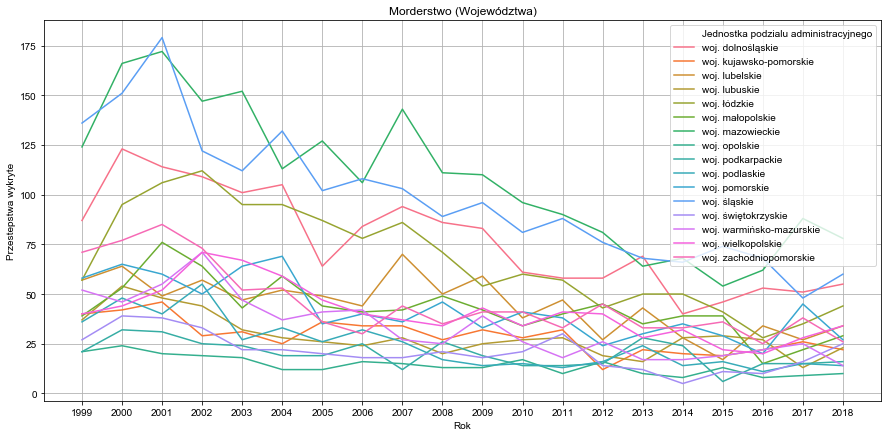

In [3]:
plt.figure(figsize=(15, 7))
plt.title('Morderstwo (Województwa)')

murder_chart = sns.lineplot(x="Rok", y="Przestepstwa wykryte", hue="Jednostka podzialu administracyjnego", data=murder_by_woj_df)
murder_chart.xaxis.set_major_locator(rok_locator)
plt.grid()
plt.show()

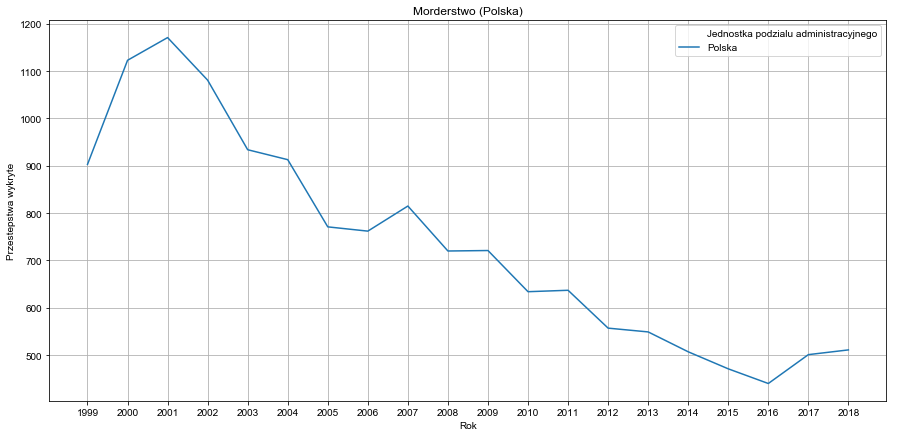

In [4]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.title("Morderstwo (Polska)")
murder_chart = sns.lineplot(
    x="Rok",
    y="Przestepstwa wykryte",
    hue="Jednostka podzialu administracyjnego",
    data=murder_poland_df
)
murder_chart.xaxis.set_major_locator(rok_locator)
plt.show()